# Traveling Wave Example

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from impact import Impact, template_dir, fieldmaps

In [3]:
ifile = os.path.join(template_dir, 'traveling_wave_cavity/ImpactT.in')
os.path.exists(ifile)

True

In [5]:
I = Impact(ifile)

================ Impact-T Summary ================
1 bunchtotal charge: 999.9999999999999 pC
Distribution type: beercan
Cathode start at z = 0 m
   emission time: 1.1e-11 s
   image charges neglected after z = 0.02 m
Tracking 16000 particles
Processor domain: 1 x 1 = 1 CPUs
Computational domain: 0.015 m x 0.015 m x 10.01 m
Space charge grid: 32 x 32 x 32
Maximum time steps: 20000
Random Seed: 6
Reference Frequency: 2856000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning


Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptbmtfwmh


In [6]:
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptbmtfwmh
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.0 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            7           7
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
           0  0.76211357187962547     
 pass generating initial distribution...
 i,t,<z>:            1   0.0000000000000000        0.0000000000000000     
 zmin,zmax:    0.0000000000000000       -9.2739597068504416E-010
 name: rfdata1rfdataxxrfdataxxx
 Ndata:           49
 i,t,<z>:            2   1.1000000000000001E-013  -2.9888658267129326E-006
 zmin,zmax:    2.4153393294559846        2.4190589030296321, elapsed: 213.4826147556305

KeyboardInterrupt: 

# Fieldmaps

In [7]:
I.input['fieldmaps']
rdfata4 = I.input['fieldmaps']['rfdata4']
rdfata5 = I.input['fieldmaps']['rfdata5']
rdfata6 = I.input['fieldmaps']['rfdata6']
rdfata7 = I.input['fieldmaps']['rfdata7']
fmap4 = fieldmaps.process_fieldmap_solrf(rdfata4)['Ez']
fmap5 = fieldmaps.process_fieldmap_solrf(rdfata5)['Ez']
fmap6 = fieldmaps.process_fieldmap_solrf(rdfata6)['Ez']
fmap7 = fieldmaps.process_fieldmap_solrf(rdfata7)['Ez']

In [8]:
fieldmaps.fieldmap_reconsruction(fmap4, 0)

0.00029705336845264885

In [9]:
fmap4

{'z0': -0.052464,
 'z1': 0.052464,
 'L': 0.104928,
 'fourier_coefficients': array([ 6.70002854e-01, -4.88198923e-01,  1.13480302e-08,  1.84595508e-01,
        -7.71467877e-09, -2.13348183e-02,  6.02607452e-10, -1.74781481e-02,
         4.51769540e-09,  1.09000464e-02, -5.96395860e-10, -2.45640689e-03,
         5.31099067e-08, -8.37267976e-04,  7.96730829e-08,  6.58132017e-04,
         2.30345527e-08, -2.85586070e-04, -1.99486350e-08, -6.43828139e-05,
         1.41973546e-08, -8.32668961e-07,  5.47140406e-08, -5.38330720e-05,
         5.84708220e-08, -2.85487322e-05, -3.37187380e-08, -2.81781237e-05,
         2.19574641e-08, -2.54874681e-05, -8.91928108e-08, -1.42715353e-05,
         6.80653280e-08, -2.43108787e-05, -9.59187448e-09, -1.48944953e-05,
        -3.21672254e-09, -1.21690943e-05, -2.00760664e-08])}

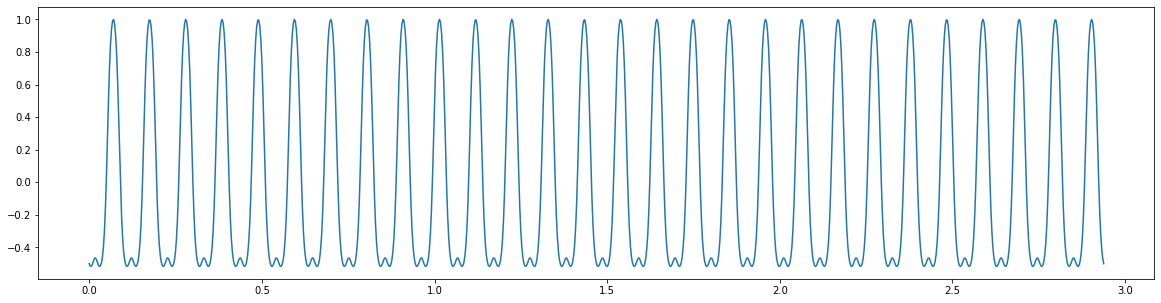

In [10]:
fmap = fmap6
zlist = np.linspace(fmap['z0'],fmap['z1'], 1000)
fieldlist = [fieldmaps.fieldmap_reconsruction(fmap, z) for z in zlist]
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(zlist, fieldlist)

In [11]:
fieldlist5 = np.array([fieldmaps.fieldmap_reconsruction(fmap5, z) for z in zlist])
fieldlist6 = np.array([fieldmaps.fieldmap_reconsruction(fmap6, z) for z in zlist])

In [12]:
c=299792458.
f = 2856e6
l = c/f
l

0.10496934803921569

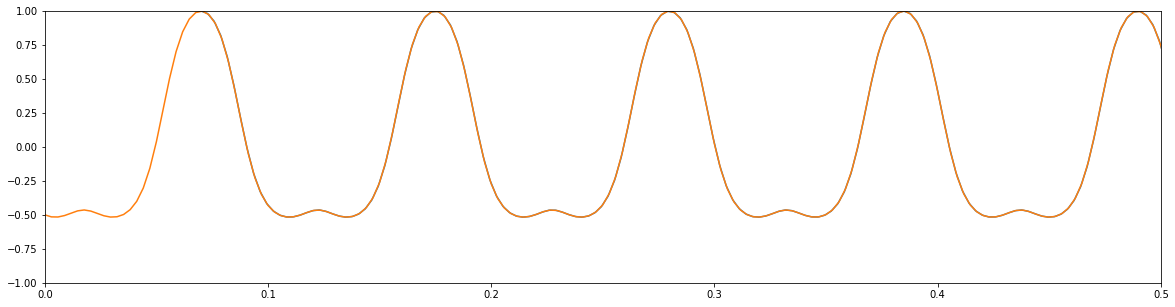

In [13]:
fig, ax = plt.subplots(figsize=(20,5))

wt = 2*np.pi/360*0
plt.ylim(-1,1)
plt.xlim(0,0.5)
ax.plot(zlist+l*2/3, fieldlist5*np.cos(wt))
ax.plot(zlist, fieldlist6*np.cos(wt))

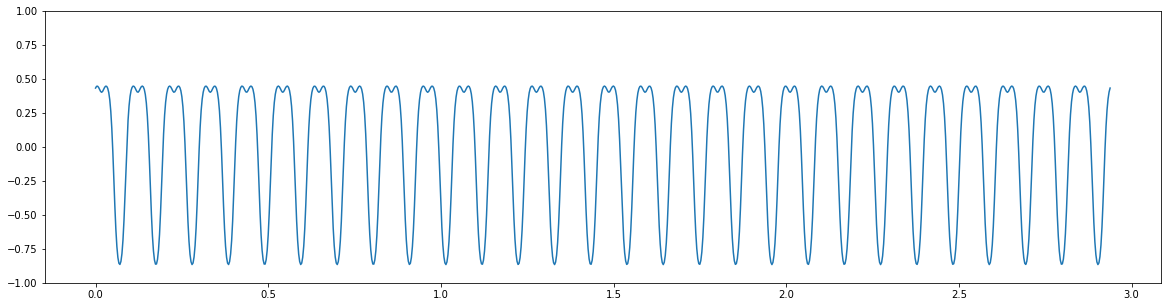

In [14]:
fig, ax = plt.subplots(figsize=(20,5))

wt = 2*np.pi/360*90
plt.ylim(-1,1)
ax.plot(zlist, fieldlist5*np.cos(wt)+fieldlist6*np.cos(wt+2*np.pi*60/360))

In [15]:
0.0586460 +  0.3371281 + 1.1518479 + 1.1515630 +  0.3351400 + 0.0609190

3.095244

In [16]:
0.0586460 +  0.3371281 + 1.1518479

1.5476219999999998

In [17]:
1.1515630 +  0.3351400 + 0.0609190

1.5476219999999998

In [18]:
stats = I.output['stats']

KeyError: 'stats'

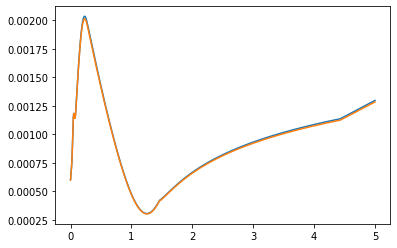

In [27]:
mec2 = 0.51099895000 # MeV

stats = I.output['stats']
impact_energy = stats ['gamma']*mec2
z    = stats ['z']
impact_sigma_x    = stats ['x_rms']
impact_sigma_y    = stats ['y_rms']
impact_sigma_z    = stats ['z_rms']
impact_normemit_x = stats ['x_normemit']
impact_normemit_y = stats ['y_normemit']
plt.plot(z, impact_sigma_x)
plt.plot(z, impact_sigma_y)
#plt.ylim(0,10)
#plt.plot(impact_z, 1e6*impact_normemit_x)
#plt.plot(impact_z, 1e6*impact_normemit_y)

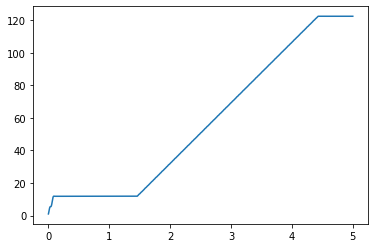

In [28]:
plt.plot(z, stats['gamma'])

In [29]:
p0 = I.particles['initial_particles']
p1 = I.particles['final_particles']

np.mean(p1['GBz'])


122.44565892947604

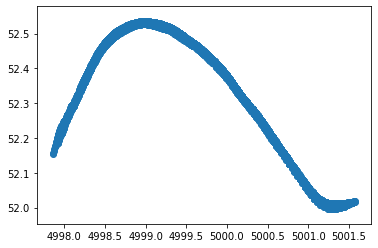

In [30]:
plt.scatter(1e3*p1['z'], (p1['GBz']-20)*mec2)

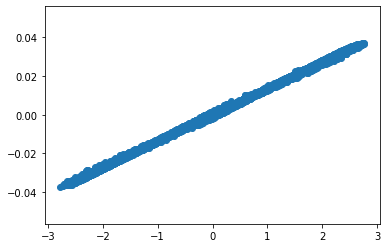

In [31]:
plt.scatter(1e3*p1['x'], (p1['GBx'])*mec2)

In [17]:
np.sqrt(10**2 - 0.511**2)

9.986935415832026